<a href="https://colab.research.google.com/github/Moukthika1253/Facial_Expression_ImageClassifier/blob/main/facial_expression_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import seaborn as sns
import tensorflow as tf

<Axes: >

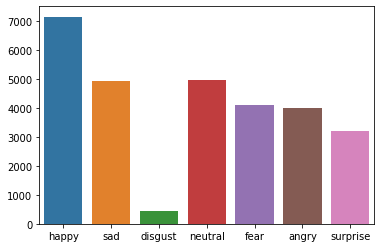

In [67]:
train_data="/content/images/train"
test_data="/content/images/validation"
train_count=[]
exp_list=[]
for emotion in os.listdir(train_data):
  exp_list.append(emotion)
  train_count.append(len(os.listdir(train_data+"/"+emotion)))
sns.barplot(x=exp_list,y=train_count)


<Axes: >

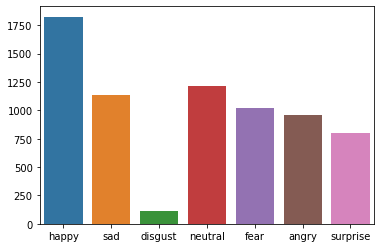

In [26]:
test_count=[]
for emotion in os.listdir(test_data):
  test_count.append(len(os.listdir(test_data+"/"+emotion)))
sns.barplot(x=exp_list,y=test_count)

**Face Expression images**

    happy            sad            disgust            neutral            fear            angry            surprise        

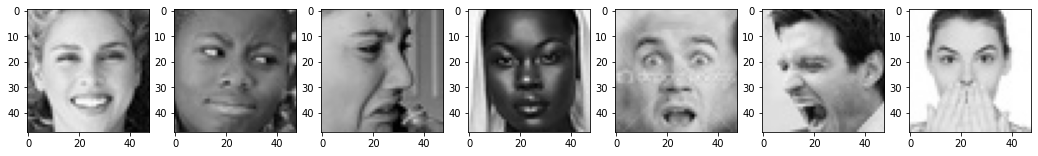

In [70]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
i=0
_, axes = plt.subplots(1, 7, figsize=(18, 16))
axes = axes.flatten()
for emotion,a in zip(os.listdir(train_data),axes):
   images=image.load_img(train_data+"/"+emotion+"/"+os.listdir(train_data+"/"+emotion)[0])
   print("    "+exp_list[i],end="        ")
   a.imshow(images,cmap="gray")
   i=i+1
plt.show()



**Image Generator**

The directory must be set to the path where your ‘n’ classes of folders are present.
The target_size is the size of your input images, every image will be resized to this size.
color_mode: if the image is either black and white or grayscale set “grayscale” or if the image has three color channels, set “rgb”.
batch_size: No. of images to be yielded from the generator per batch.
class_mode: Set “binary” if you have only two classes to predict, if not set to“categorical”, in case if you’re developing an Autoencoder system, both input and the output would probably be the same image, for this case set to “input”.
shuffle: Set True if you want to shuffle the order of the image that is being yielded, else set False.
seed: Random seed for applying random image augmentation and shuffling the order of the image.

In [72]:
from keras.preprocessing.image import ImageDataGenerator
data_train = ImageDataGenerator()
data_validation=ImageDataGenerator()
train_gen=data_train.flow_from_directory(train_data,target_size=(48,48),
                                                    color_mode="grayscale",
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    shuffle=True,seed=42)
validation_gen=data_validation.flow_from_directory(test_data,target_size=(48,48),
                                                    color_mode="grayscale",
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


**Using Convolutional Neural Networks (CNN)**